In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv("weatherAUS.csv")
X=dataset.iloc[:,1:].values

print(X)


[['Albury' 13.4 22.9 ... 21.8 'No' 'No']
 ['Albury' 7.4 25.1 ... 24.3 'No' 'No']
 ['Albury' 12.9 25.7 ... 23.2 'No' 'No']
 ...
 ['Uluru' 5.4 26.9 ... 26.1 'No' 'No']
 ['Uluru' 7.8 27.0 ... 26.0 'No' 'No']
 ['Uluru' 14.9 nan ... 20.9 'No' nan]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 ... 21.8 'No' 'No']
 [0.0 0.0 1.0 ... 24.3 'No' 'No']
 [0.0 0.0 1.0 ... 23.2 'No' 'No']
 ...
 [0.0 0.0 0.0 ... 26.1 'No' 'No']
 [0.0 0.0 0.0 ... 26.0 'No' 'No']
 [0.0 0.0 0.0 ... 20.9 'No' nan]]


In [ ]:
print(X[:,54])

['W' 'WNW' 'WSW' ... 'N' 'SE' nan]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [54,56,57])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 21.8 'No' 'No']
 [0.0 0.0 0.0 ... 24.3 'No' 'No']
 [0.0 0.0 0.0 ... 23.2 'No' 'No']
 ...
 [0.0 0.0 0.0 ... 26.1 'No' 'No']
 [0.0 0.0 0.0 ... 26.0 'No' 'No']
 [0.0 0.0 0.0 ... 20.9 'No' nan]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


X[:,-1]=le.fit_transform(X[:,-1])
X[:,-2]=le.fit_transform(X[:,-2])





In [ ]:
print(X)


[[0.0 0.0 0.0 ... 21.8 0 0]
 [0.0 0.0 0.0 ... 24.3 0 0]
 [0.0 0.0 0.0 ... 23.2 0 0]
 ...
 [0.0 0.0 0.0 ... 26.1 0 0]
 [0.0 0.0 0.0 ... 26.0 0 0]
 [0.0 0.0 0.0 ... 20.9 0 2]]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:,:] )

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, :] = sc.fit_transform(X[:,:])
print(X)


[[-0.25955567248174444 -0.242899096084587 -0.23105463953714103 ...
  0.017023228228163437 -0.5398604685294461 -0.5398609299883909]
 [-0.25955567248174444 -0.242899096084587 -0.23105463953714103 ...
  0.38198495219120704 -0.5398604685294461 -0.5398609299883909]
 [-0.25955567248174444 -0.242899096084587 -0.23105463953714103 ...
  0.22140179364746765 -0.5398604685294461 -0.5398609299883909]
 ...
 [-0.25955567248174444 -0.242899096084587 -0.23105463953714103 ...
  0.6447573934445985 -0.5398604685294461 -0.5398609299883909]
 [-0.25955567248174444 -0.242899096084587 -0.23105463953714103 ...
  0.6301589244860766 -0.5398604685294461 -0.5398609299883909]
 [-0.25955567248174444 -0.242899096084587 -0.23105463953714103 ...
  -0.11436299239853256 -0.5398604685294461 3.548976688199698]]


[17164280.000003412]
[17164280.000003412, 16610061.42601915]
[17164280.000003412, 16610061.42601915, 16332383.7538016]
[17164280.000003412, 16610061.42601915, 16332383.7538016, 16049297.40161423]


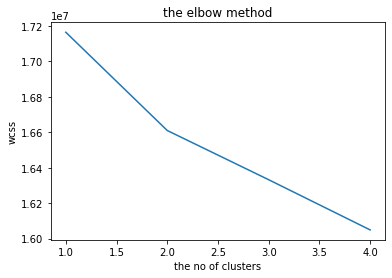

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,5):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(wcss)
plt.plot(range(1,5),wcss)
plt.title('the elbow method')
plt.xlabel('the no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#the no of clusters according to the elbow graph should be 4
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)


In [ ]:
plt.scatter(X[y_kmeans == 0, -8], X[y_kmeans == 0, -9], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, -8], X[y_kmeans == 1, -9], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, -8], X[y_kmeans == 2, -9], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, -8], X[y_kmeans == 3, -9], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, -8], kmeans.cluster_centers_[:, -9], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of weather')
plt.xlabel('pressure9am')
plt.ylabel('humidity3pm')
plt.legend()
plt.show()